## 이미지인식_CDN

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# MNIST 데이터 셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print(X_train[0].shape)
print("학습 셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트 셋 이미지 수 : %d 개" % (X_test.shape[0]))

(28, 28)
학습 셋 이미지 수 : 60000 개
테스트 셋 이미지 수 : 10000 개


In [2]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

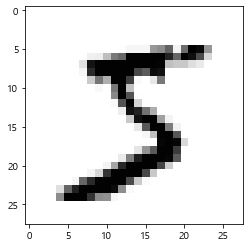

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [4]:
import sys
for x in X_train[0]:
    
    for i in x:
        sys.stdout.write("%d\t" % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [5]:
X_train[0].shape # 

(28, 28)

In [6]:
print(X_train.shape)
print("28 X 28 2차원 데이터")

(60000, 28, 28)
28 X 28 2차원 데이터


In [7]:
vec1 = X_train.shape[1] * X_train.shape[2]
vec1

784

In [8]:
# 차원 변환 28 X 28 2차원 데이터 784개의 1차원 데이터로 변경시켜줌
X_train = X_train.reshape(X_train.shape[0], vec1)

# 데이터 정규화(normalization) : 0 ~ 255 값 255로 나눠줌
# 0 ~ 1값으로 정규화 되면서 최적의 성능으로 예측해줌
X_train = X_train.astype('float64') # 정수형 값 실수값으로 변경해 줄 필요있음 0~1값 나와야함
X_train = X_train / 255

# 테스트 셋 에서도 정규화 작업
X_test = X_test.reshape(X_test.shape[0], vec1)
X_test = X_test.astype('float64')
X_test = X_test / 255

In [9]:
# 클래스 값 확인
Y_class_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# 클래스 값 확인
print("class : %d" % (Y_class_train[0]))

class : 5


In [11]:
# 현재 클래스를 0 ~ 9 정수값에서 0 or 1인 벡터로 수정해야 한
# 바이너리화 과정
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [12]:
Y_class_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [13]:
X_train.shape

(60000, 784)

In [14]:
# 모델 설정
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 출력층 10개

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 모델 저장
MODEL_DIR = './model_chapter_16_1/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model_chapter_16_1/{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only = True)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

# 모델 실행
history = model.fit(X_train, Y_train, validation_data = \
                    (X_test, Y_test), epochs = 30, batch_size = 200, verbose = 0, \
                    callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15295, saving model to ./model_chapter_16_1\01-0.1530.hdf5

Epoch 00002: val_loss improved from 0.15295 to 0.10566, saving model to ./model_chapter_16_1\02-0.1057.hdf5

Epoch 00003: val_loss improved from 0.10566 to 0.08151, saving model to ./model_chapter_16_1\03-0.0815.hdf5

Epoch 00004: val_loss improved from 0.08151 to 0.07586, saving model to ./model_chapter_16_1\04-0.0759.hdf5

Epoch 00005: val_loss improved from 0.07586 to 0.06805, saving model to ./model_chapter_16_1\05-0.0681.hdf5

Epoch 00006: val_loss improved from 0.06805 to 0.06725, saving model to ./model_chapter_16_1\06-0.0673.hdf5

Epoch 00007: val_loss improved from 0.06725 to 0.06116, saving model to ./model_chapter_16_1\07-0.0612.hdf5

Epoch 00008: val_loss did not improve from 0.06116

Epoch 00009: val_loss improved from 0.06116 to 0.06024, saving model to ./model_chapter_16_1\09-0.0602.hdf5

Epoch 00010: val_loss did not improve from 0.06024

Epoch 00011: val_loss did n

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

313/313 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.9763
Test Accuracy : 0.9763
313/313 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.9763
Test loss : 0.0968


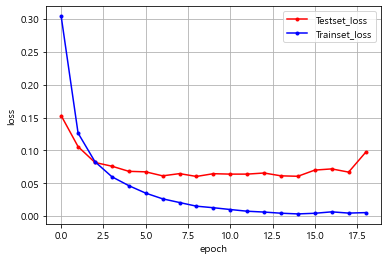

In [16]:
print("Test Accuracy : %.4f" % model.evaluate(X_test, Y_test)[1])
print("Test loss : %.4f" % model.evaluate(X_test, Y_test)[0])

# 테스트 셋 오차
y_vloss = history.history['val_loss']

# 학습 셋 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = ".", c = "red", label = "Testset_loss")
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = "Trainset_loss")

# 그리드 표시
plt.legend(loc = 'upper right')
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- 하나의 은닉층을 둔 단순한 딥러닝 모델의 테스트 정확도는 98.05%

In [17]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_pred = np.argmax(np.round(model.predict(X_test)),axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
y_real = np.argmax(Y_test, axis = 1)
y_real

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
miss = np.where(y_real != y_pred)[0]
miss

array([   8,  115,  151,  247,  259,  321,  340,  445,  447,  495,  582,
        619,  659,  674,  684,  691,  707,  720,  896,  900,  947,  951,
        956,  965, 1003, 1014, 1039, 1112, 1156, 1178, 1182, 1192, 1226,
       1242, 1247, 1299, 1319, 1326, 1328, 1331, 1378, 1393, 1395, 1403,
       1444, 1522, 1530, 1549, 1609, 1637, 1670, 1681, 1737, 1751, 1790,
       1800, 1878, 1901, 1911, 1941, 2004, 2016, 2018, 2024, 2029, 2035,
       2043, 2053, 2070, 2073, 2109, 2118, 2129, 2130, 2135, 2162, 2182,
       2185, 2224, 2237, 2291, 2293, 2329, 2369, 2387, 2406, 2426, 2454,
       2488, 2515, 2526, 2597, 2604, 2607, 2648, 2654, 2730, 2743, 2810,
       2915, 2921, 2927, 2939, 2995, 3030, 3073, 3117, 3225, 3289, 3405,
       3422, 3503, 3520, 3533, 3542, 3558, 3565, 3597, 3662, 3702, 3727,
       3749, 3751, 3757, 3776, 3780, 3796, 3808, 3818, 3838, 3853, 3902,
       3941, 3968, 3985, 4000, 4027, 4065, 4078, 4163, 4176, 4199, 4248,
       4255, 4271, 4289, 4294, 4315, 4360, 4400, 44

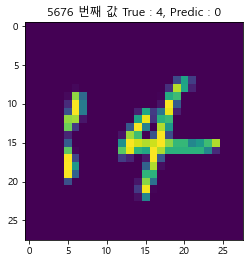

In [21]:
i = np.random.choice(miss)
X_test_image = X_test.reshape(10000, 28, 28)
plt.imshow(X_test_image[i])
plt.title("%s 번째 값 True : %s, Predic : %s"%(i, y_real[i], y_pred[i]))
plt.show()

In [22]:
1 - (miss.shape[0] / y_real.shape[0])

0.9754

-----
-----

### 영상 인식(image recognition)
- 영상 안의 물체를 인식하거나 분류 하는 것

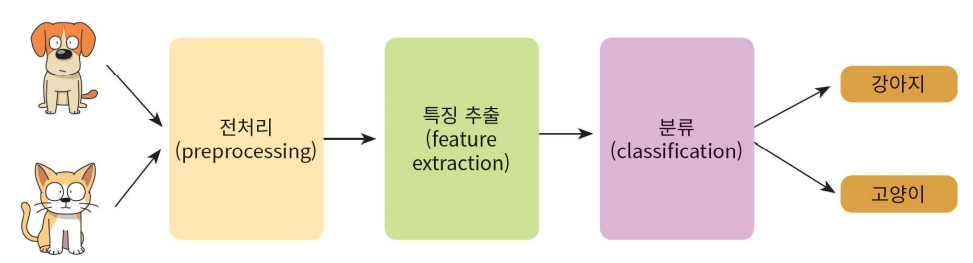

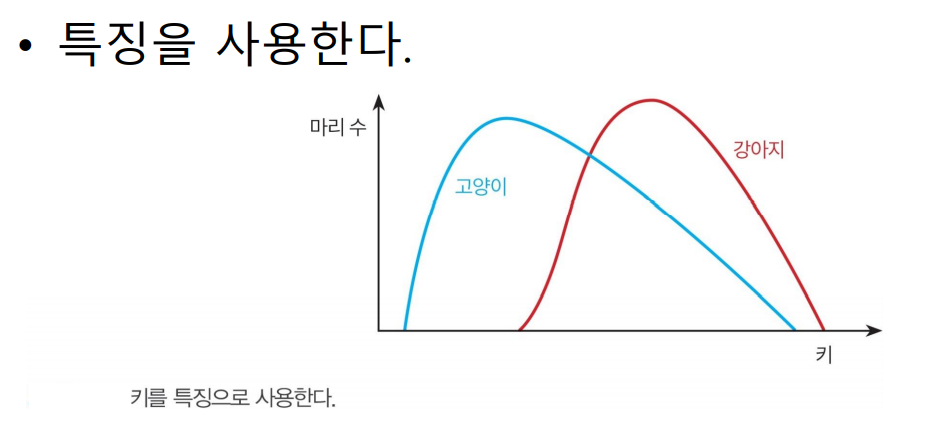

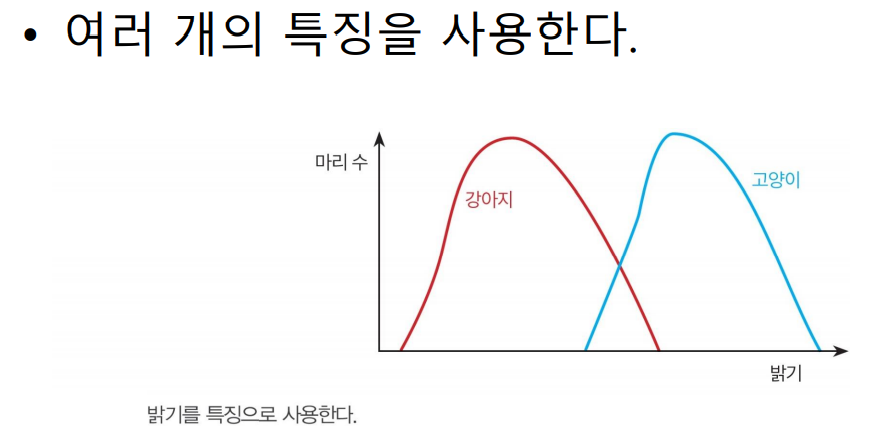

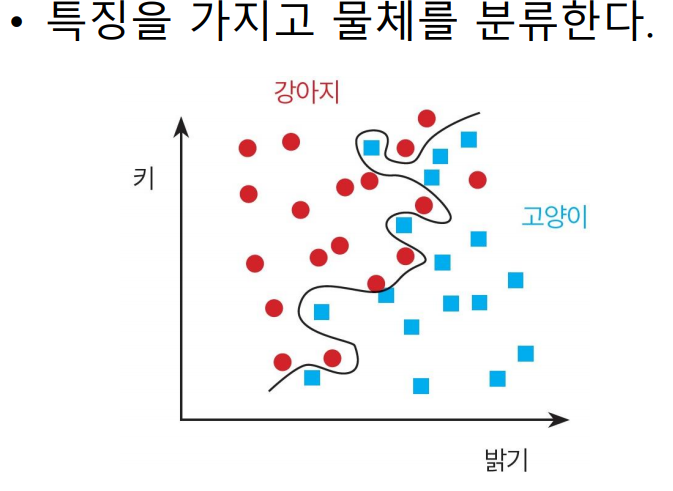

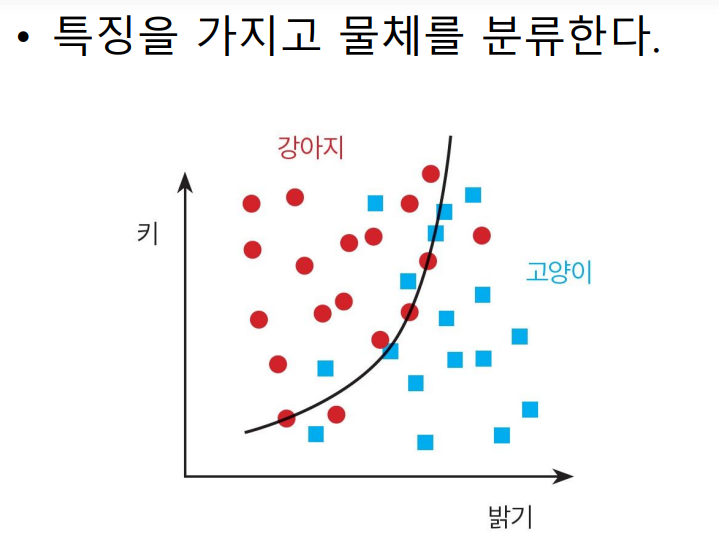

### 컨볼루션 신경망(CNN, Convolution Neural Net)
- 입력된 이미지에서 다시 한번 특징을 추출하기 위해 마스크(=필터, 윈도, 커널)를 도입하는 기법

- 입력된 이미지가 다음과 같은 픽셀 값을 가지고 있다고 가정해보자<br>
|0000|1111|2222|3333| 
|---|---|---|---|
|1|0|1|0|
|0|1|1|0|
|0|0|1|1|
|0|0|1|0|

- 여기에 2 X 2  커널을 적용. 마스크 각 칸에는 가중치가 들어있음
|2X2커널|2X2커널|
|---|---|
|1|0|
|0|1|

- 이제 커널을 맨 왼쪽 윗칸부터 적용해보면
- 커널이 적용된 부분은 2가 추출(1 * 1) + (0 * 0) + (0 * 0) + (1 * 1) = 2

- 새롭게 만들어진 층을 컨볼루션(합성곱)이라고 부름<br><br>

- 컨볼루션을 만들면 입력 데이터로부터 더욱 정교한 특징을 추출 할 수 있음
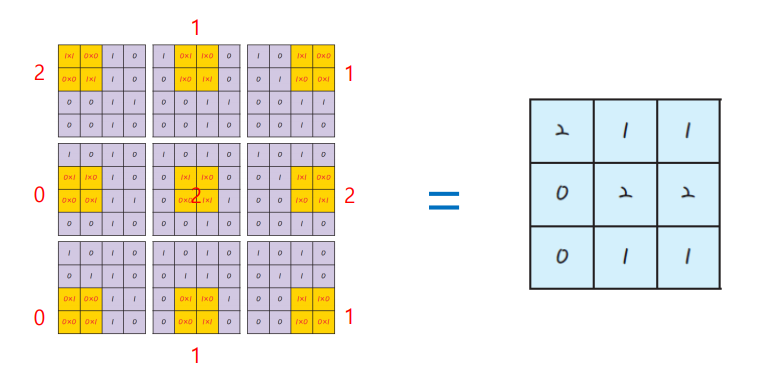

### 맥스 풀링

- 컨볼루션 층 통해 이미지 특징 추출<br><br>

- 하지만 그 결과가 여전히 크고 복잡하면 이를 다시 축소해야함. 이과정을 **풀링(pooling)** 또는 **서브 샘플링(sub sampling)**<br><br>

- 풀링 기법<br><br>
 1. **맥스 풀링(max pooling)** : 정해진 구역안에서 최댓값 뽑아냄
 2. **평균 풀링(average pooling)** : 평균값 뽑아냄

- 맥스 풀링<br><br>
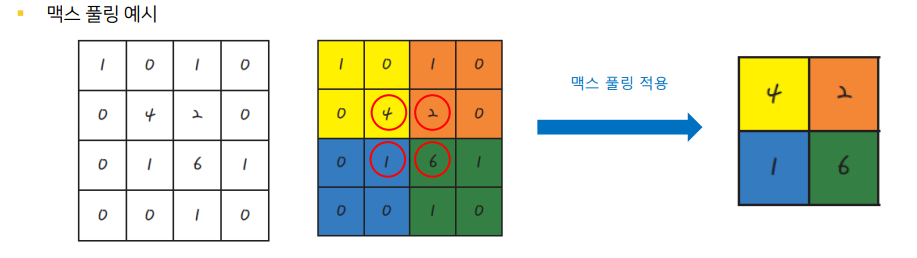
- 그림처럼 구역을 4부분으로 나누고 각 구역에서 가장 큰 값 추출함

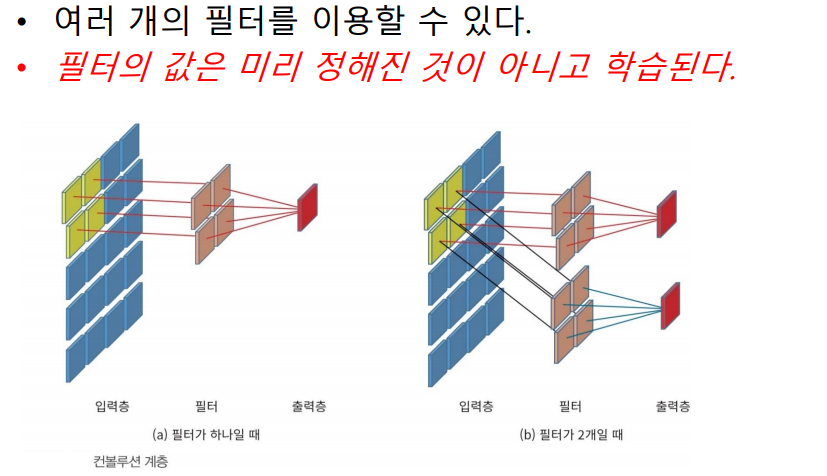

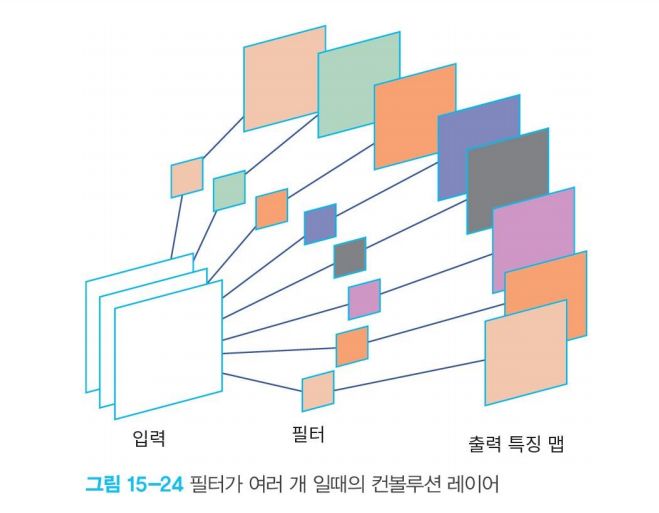

### 드롭아웃
- 딥러닝 학습을 실행할 때 가장 중요한 것은 과적합을 얼마나 효과적으로 피해가는지에 달려 있다고 해도 과언이 아니다.<br><br>

- 이러한 과정을 도와주는것 중 하나가 바로 **드롭아웃**<br><br>

- 드롭아웃은 은닉층에 배치된 노드 중 일부를 임의로 꺼줘서 과적합 방지해줌<br><br>

- 랜덤하게 노드를 끔으로써 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지<br><br>

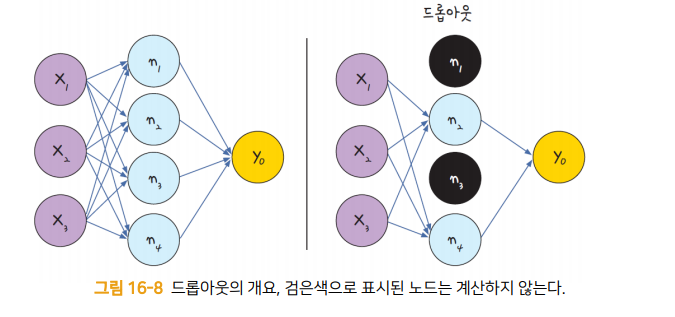

### 플래튼
- 컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열인 채로 다룬다<br><br>

- 이를 1차원배열로 바꿔주어야 활성화 함수가 있는 층에서 사용가능<br><br>

- 1차원 배열로 바꿔주는 값이 바로 플래튼함수

In [39]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# MNIST 데이터 셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print(X_train[0].shape)
print("학습 셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트 셋 이미지 수 : %d 개" % (X_test.shape[0]))

(28, 28)
학습 셋 이미지 수 : 60000 개
테스트 셋 이미지 수 : 10000 개


In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train.astype('float32') 
X_train = X_train / 255

In [42]:
X_train.shape

(60000, 28, 28, 1)

In [43]:
X_test.shape

(10000, 28, 28)

In [44]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = X_test.astype('float32') 
X_test = X_test / 255

In [45]:
X_test.shape

(10000, 28, 28, 1)

In [46]:
Y_train = to_categorical(Y_class_train)
Y_test = to_categorical(Y_class_test)

In [47]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25)) # 데이터 25%걸러줌
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5)) # 50% 걸러줌
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [49]:
# # # 모델 저장
# MODEL_DIR = './model_chapter_16_2/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)
    
# modelpath="./model_chapter_16_2/{epoch:02d}-{val_loss:.4f}.hdf5"

# checkpointer = ModelCheckpoint(filepath = model, monitor = 'val_loss', 
#                                verbose = 1, save_best_only = True)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [52]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), \
                    epochs = 30, batch_size = 200, verbose = 0, \
                    callbacks = [early_stopping_callback])

In [55]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 4s 13ms/step - loss: 0.0272 - accuracy: 0.9926

 Test Accuracy: 0.9926


In [57]:
print("\n Test loss: %.4f" % (model.evaluate(X_test, Y_test)[0]))

313/313 [==============================] - 4s 14ms/step - loss: 0.0272 - accuracy: 0.9926

 Test loss: 0.0272


In [60]:
# 테스트 셋 오차
y_vloss = history.history['val_loss']

# 학습 셋 오차
y_loss = history.history['loss']


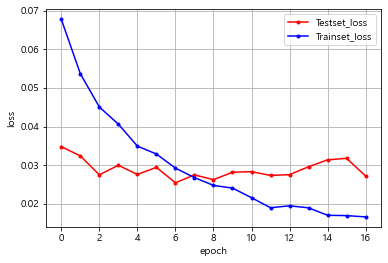

In [61]:
# 그래프로 표현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = ".", c = "red", label = "Testset_loss")
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = "Trainset_loss")

# 그리드 표시
plt.legend(loc = 'upper right')
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [66]:
y_pred = np.argmax(np.round(model.predict(X_test)),axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [68]:
y_real = np.argmax(Y_test,axis = 1)
y_real

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [71]:
miss = np.where(y_real != y_pred)[0]
miss

array([  92,  321,  449,  582,  619,  659,  844,  938,  947, 1014, 1033,
       1039, 1182, 1226, 1232, 1242, 1260, 1393, 1414, 1530, 1621, 1709,
       1878, 1901, 1903, 2035, 2043, 2118, 2130, 2135, 2185, 2280, 2293,
       2406, 2414, 2597, 2654, 2896, 2927, 2939, 2953, 3030, 3060, 3225,
       3422, 3520, 3558, 3727, 3808, 3853, 3941, 4007, 4176, 4289, 4536,
       4571, 4639, 4740, 4761, 5331, 5937, 5955, 6560, 6576, 6597, 6625,
       6651, 7216, 8059, 8325, 8408, 8527, 9009, 9015, 9664, 9692, 9729,
       9839], dtype=int64)

In [80]:
X_test.shape

(10000, 28, 28, 1)

In [79]:
X_test.reshape(10000, 28, 28)

(10000, 28, 28)

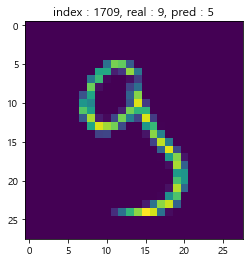

In [87]:
i = np.random.choice(miss)
X_image = X_test.reshape(10000, 28, 28)
plt.imshow(X_image[i])
plt.title("index : {}, real : {}, pred : {}".format(i, y_real[i], y_pred[i]))
plt.show()

In [91]:
1 - (miss.shape[0]/X_test.shape[0])

0.9922